In [1]:
import matplotlib.pyplot as plt
import numpy as np

# GPU Results

In [2]:
%cd experiments/tuning/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/tuning


In [3]:
!ls 

100units_0.py       200units_0.py       300units_0.py       50units_0.py
100units_1.py       200units_1.py       300units_1.py       50units_1.py
100units_2.py       200units_2.py       300units_2.py       50units_2.py
10units_0.py        20units_0.py        400units_0.py       generator_tuning.sh
10units_1.py        20units_1.py        400units_1.py
10units_2.py        20units_2.py        400units_2.py


In [4]:
a = !ls
# Exclude the script from the list
a = a[:-1]

In [5]:
def extract_metrics(filename): 
    f = open(filename, 'r')
    lines = f.readlines() 
    gpu_usage = None
    gpu_mem = None
    for line in lines: 
        if "=> Average precision" in line: 
            accuracy = float(line.split(" ")[-1])
        if "=> Total training time" in line: 
            training_time = float(line.split(" ")[-2])
        if "GPU BEFORE EVALUATION:" in line: 
            gpu_usage, gpu_mem = eval(line[22:])
    return (accuracy, training_time, gpu_usage, gpu_mem)

In [6]:
def calculate_metrics(files): 
    metrics = dict()
    
    for file in files: 
        units = int(file[:-10]) 
        if units in metrics: 
            metrics[units].append(extract_metrics(file))
        else: 
            metrics[units] = [extract_metrics(file)] 
    
    return metrics

In [7]:
metrics = calculate_metrics(a)

In [8]:
metrics

{100: [(0.9967, 62.3, 10.285714285714286, 12),
  (0.9941, 62.5, 10.714285714285714, 12),
  (0.9939, 70.1, 9.75, 12)],
 10: [(0.864, 66.8, 9.857142857142858, 12),
  (0.9836, 67.1, 9.857142857142858, 12),
  (0.7638, 69.7, 9.571428571428571, 12)],
 200: [(0.9967, 71.3, 9.75, 18),
  (0.9964, 67.9, 10.285714285714286, 18),
  (0.9928, 67.1, 10.142857142857142, 18)],
 20: [(0.9888, 66.8, 11.285714285714286, 12),
  (0.8851, 59.8, 11.5, 12),
  (0.8663, 63.0, 11.285714285714286, 12)],
 300: [(0.9943, 66.4, 11.857142857142858, 26),
  (0.9961, 68.5, 10.428571428571429, 26),
  (0.9961, 65.6, 11.428571428571429, 26)],
 400: [(0.9958, 59.9, 13.0, 44),
  (0.9933, 58.9, 14.333333333333334, 44),
  (0.9973, 61.8, 12.142857142857142, 44)],
 50: [(0.9907, 61.3, 11.285714285714286, 12),
  (0.9925, 60.9, 10.857142857142858, 12),
  (0.9967, 68.0, 10.571428571428571, 12)]}

In [9]:
usages = sorted([(x, sum([y[2] for y in metrics[x]])/3) for x in metrics])

In [10]:
mems = sorted([(x, sum([y[3] for y in metrics[x]])/3) for x in metrics])

In [11]:
accs = sorted([(x, sum([y[0] for y in metrics[x]])/3) for x in metrics])

In [12]:
training_times = sorted([(x, sum([y[1] for y in metrics[x]])/3) for x in metrics])

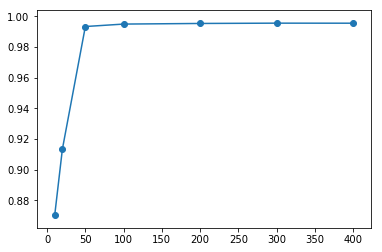

In [13]:
plt.plot(list(zip(*accs))[0], list(zip(*accs))[1])
plt.scatter(list(zip(*accs))[0], list(zip(*accs))[1])
plt.show()

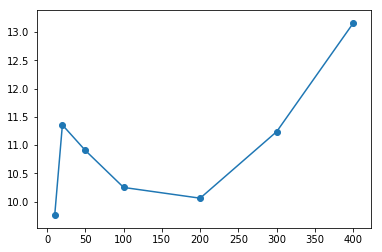

In [14]:
plt.plot(list(zip(*usages))[0], list(zip(*usages))[1])
plt.scatter(list(zip(*usages))[0], list(zip(*usages))[1])
plt.show()

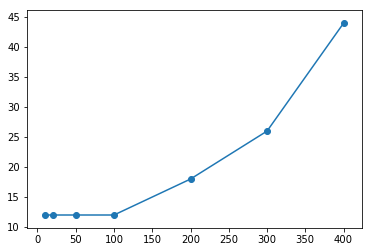

In [15]:
plt.plot(list(zip(*mems))[0], list(zip(*mems))[1])
plt.scatter(list(zip(*mems))[0], list(zip(*mems))[1])
plt.show()

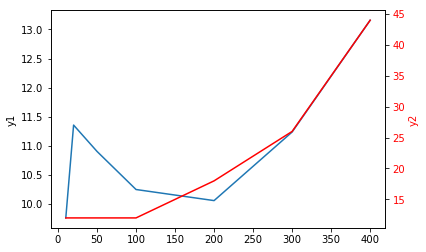

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(list(zip(*usages))[0], list(zip(*usages))[1])
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(list(zip(*mems))[0], list(zip(*mems))[1], 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

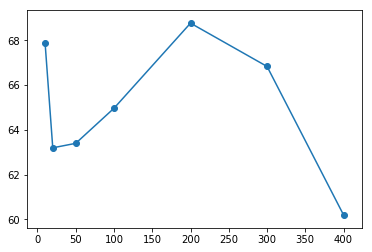

In [18]:
plt.plot(list(zip(*training_times))[0], list(zip(*training_times))[1])
plt.scatter(list(zip(*training_times))[0], list(zip(*training_times))[1])
plt.show()

# No-GPU Results

In [19]:
%cd ../tuning_nogpu/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/tuning_nogpu


In [20]:
a = !ls
# Exclude the script from the list
a = a[:-1]

In [21]:
metrics = calculate_metrics(a)

In [22]:
accs = sorted([(x, sum([y[0] for y in metrics[x]])/3) for x in metrics])
training_times = sorted([(x, sum([y[1] for y in metrics[x]])/3) for x in metrics])

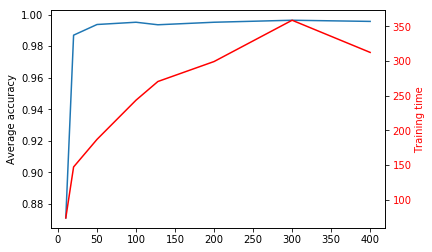

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(list(zip(*accs))[0], list(zip(*accs))[1])
ax1.set_ylabel('Average accuracy')

ax2 = ax1.twinx()
ax2.plot(list(zip(*training_times))[0], list(zip(*training_times))[1], 'r-')
ax2.set_ylabel('Training time', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')